# ONLINE RETAIL STORE

# INTRODUCTION
I was inspired to begin this project after concluding a comprehensive marketing analytics course on DataCamp. Driven by my passion for marketing and analytics, I began by diving deeper into understanding customer behavior analyics in the marketing world. In a dynamic and competitive landscape, understanding customer behavior is essential to sustaining growth and achieving business success. 

The ability to segment customers based on their purchasing patterns allows businesses to tailor their marketing efforts, enhance customer satisfaction, and ultimately boost profitability. This project focuses on leveraging the RFM (Recency, Frequency, and Monetary) anlytical method to perform a detailed segmentation analysis and clustering of customer data for an Online Retail Store to uncover valuable insights that can drive targeted marketing and improve customer relationships. 

RFM analysis is a proven marketing technique that evaluates customers based on three key metrics. It helps businesses see how recently customers made purchases, how often they buy, and how much they spend. By looking at these factors, we can identify different types of customers and tailor our marketing strategies to meet their needs. The insights derived from RFM analysis facilitates the identification of high-value customers and helps in designing personalized offers that resonate with different customer groups.

OBJECTIVE

The primary objective of this project is to conduct a segmentation analysis and clustering of customer data for an Online Retail Store using the RFM (Recency, Frequency, and Monetary) method. By leveraging advanced data analytics techniques, this project aims to identify distinct customer segments based on their purchasing behavior and transactional patterns. The goal is to uncover actionable insights that can drive targeted marketing strategies, enhance customer retention, and optimize overall business performance. Through the analysis and interpretation of the RFM model, this project seeks to provide a robust framework for understanding customer value and fostering a more personalized and effective approach to customer relationship management.

DATA DESCRPTION

This is a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

InvoiceNo: A unique 6-digit integral number assigned to each transaction. If this code starts with the letter 'C', it simply indicates that the transaction was cancelled.

StockCode: A 5-digit integral number uniquely assigned to each distinct product (item).

Description: The name of the product (item). This is a nominal variable.

Quantity: The quantity of each product (item) per transaction. This is a numeric variable.

InvoiceDate: The date and time when each transaction was generated. This is a numeric variable.

UnitPrice: The price per unit of the product in sterling. This is a numeric variable.

CustomerID: A unique 5-digit integral number assigned to each customer. This is a nominal variable.

Country: The name of the country where each customer resides. This is a nominal variable.


In [1]:
#Import required libraries for dataframe and visualization
import pandas as pd # # library for data analysis
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime 

#Import required libraries for K-Means clustering
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans






In [2]:
file_name = 'Online Retail.csv'
Retail = pd.read_excel(file_name) #Load the dataset which is in excel format


In [3]:
Retail 

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [4]:
Retail.dtypes # Check out for the data types of each column if they fit

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object

In [5]:
#Converting the Customer ID and the invoice date column data types
#Change the CustomerID data type to object
Retail['CustomerID'] = Retail['CustomerID'].astype('object') 

In [6]:
#Change the InvoiceDate date format to Year, months and days
Retail['InvoiceDate'] = Retail['InvoiceDate'].dt.strftime('%Y-%m-%d')


In [7]:
#Now convert the invoice date to datetime data type
Retail['InvoiceDate'] = pd.to_datetime( Retail['InvoiceDate'])

In [8]:
Retail
#The data types have been fitted properly and the invoice date with a new format

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09,4.15,12680.0,France


In [9]:
#Detect Null values
Retail.isna().sum() #Check out for null values within the dataset

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [10]:
#The Customer ID has a large number of null values. Lets check the dataframe of customer id data with null values
Null = Retail[Retail['CustomerID'].isna() | (Retail['CustomerID'] == '')]
Null

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,2010-12-01,0.00,NaN,United Kingdom
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,2010-12-01,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,2010-12-01,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,2010-12-01,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,2010-12-01,1.66,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
541536,581498,85099B,JUMBO BAG RED RETROSPOT,5,2011-12-09,4.13,NaN,United Kingdom
541537,581498,85099C,JUMBO BAG BAROQUE BLACK WHITE,4,2011-12-09,4.13,NaN,United Kingdom
541538,581498,85150,LADIES & GENTLEMEN METAL SIGN,1,2011-12-09,4.96,NaN,United Kingdom
541539,581498,85174,S/4 CACTI CANDLES,1,2011-12-09,10.79,NaN,United Kingdom


In [11]:
#Check for the null values of customer ID and Description columns
Nulls_Cid_Des = Retail[Retail['CustomerID'].isna() & (Retail['Description'].isna())]
Nulls_Cid_Des

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,2010-12-01,0.0,NaN,United Kingdom
1970,536545,21134,NaN,1,2010-12-01,0.0,NaN,United Kingdom
1971,536546,22145,NaN,1,2010-12-01,0.0,NaN,United Kingdom
1972,536547,37509,NaN,1,2010-12-01,0.0,NaN,United Kingdom
1987,536549,85226A,NaN,1,2010-12-01,0.0,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
535322,581199,84581,NaN,-2,2011-12-07,0.0,NaN,United Kingdom
535326,581203,23406,NaN,15,2011-12-07,0.0,NaN,United Kingdom
535332,581209,21620,NaN,6,2011-12-07,0.0,NaN,United Kingdom
536981,581234,72817,NaN,27,2011-12-08,0.0,NaN,United Kingdom


In [12]:
#This depicts that all customer ID records with null values is associated with 1454 null values in the description column.
#As a result, we drop all the null values

In [13]:
Retail.dropna(inplace=True)

In [14]:
#Confirm the null values 
Retail.isna().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [15]:
#Check for unique values in the dataset
n_unique = Retail.nunique()
print('Number of unique: {}'.format(n_unique))

Number of unique: InvoiceNo      22190
StockCode       3684
Description     3896
Quantity         436
InvoiceDate      305
UnitPrice        620
CustomerID      4372
Country           37
dtype: int64


There are 37 unique countries that the company transacts with.

In [16]:
Retail.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  object        
 7   Country      406829 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 27.9+ MB


DATA EXPLORATION
 

In [17]:
#Which product is the most ordered
Most_Ordered_Product = Retail.groupby('Description')['Quantity'].sum().reset_index().sort_values(by='Quantity', ascending=False).head()
Most_Ordered_Product

,Description,Quantity
3805,WORLD WAR 2 GLIDERS ASSTD DESIGNS,53215
1771,JUMBO BAG RED RETROSPOT,45066
217,ASSORTED COLOUR BIRD ORNAMENT,35314
3716,WHITE HANGING HEART T-LIGHT HOLDER,34147
2279,PACK OF 72 RETROSPOT CAKE CASES,33409


In [18]:
Most_Ordered_Product = Most_Ordered_Product.set_index('Description') # Set Description column as the index
Most_Ordered_Product

,Quantity
Description,
WORLD WAR 2 GLIDERS ASSTD DESIGNS,53215
JUMBO BAG RED RETROSPOT,45066
ASSORTED COLOUR BIRD ORNAMENT,35314
WHITE HANGING HEART T-LIGHT HOLDER,34147
PACK OF 72 RETROSPOT CAKE CASES,33409


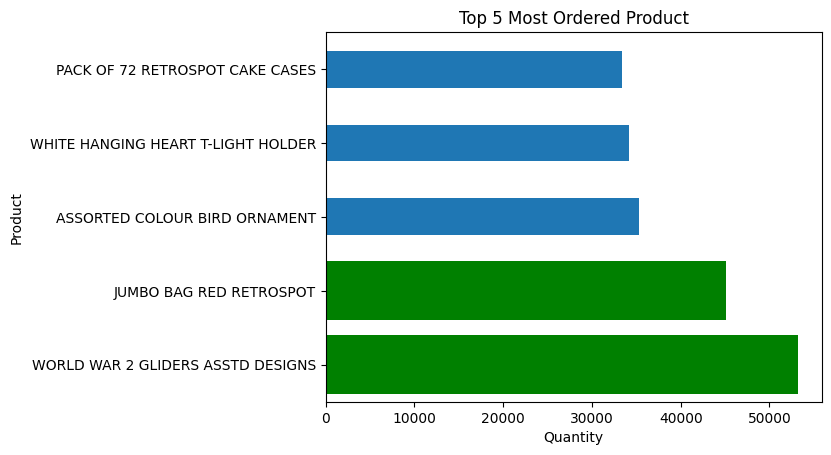

In [19]:
Most_Ordered_Product.plot(y='Quantity', kind='barh', legend=None)
plt.title('Top 5 Most Ordered Product')
plt.xlabel('Quantity')
plt.ylabel('Product')
plt.barh(Most_Ordered_Product.index[:2], Most_Ordered_Product['Quantity'][:2], color='green')
plt.show()

World war 2 Gliders Assorted designs has the highest number of quantity ordered. Followed by Jumbo Bag Red Retrospot

In [20]:
#Which country has ordered the most 
Most_Ordered_Country = Retail.groupby('Country')['Quantity'].sum().reset_index().sort_values(
                        by='Quantity', ascending=False).set_index('Country').head()
Most_Ordered_Country

,Quantity
Country,
United Kingdom,4008533
Netherlands,200128
EIRE,136329
Germany,117448
France,109848


In [21]:
#Create a function for the the bar graph so it can be applicable for creating other 

def bar(df, y_column,title=None, xlabel=None, ylabel=None):
    ax= df.plot(y=y_column, kind='barh', legend=None)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
        
    plt.show()

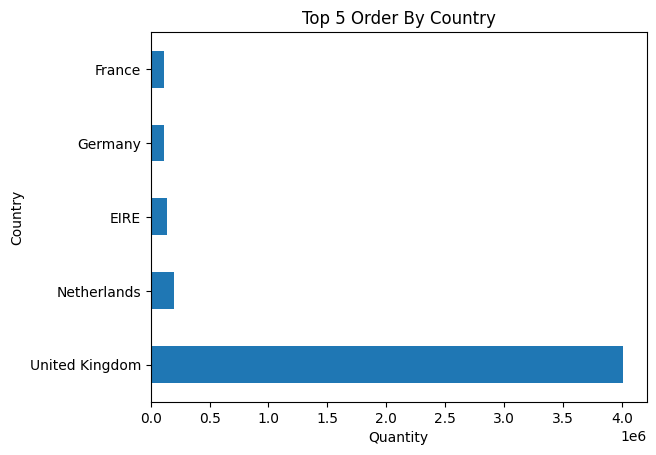

In [22]:
#Apply the function
bar(Most_Ordered_Country, y_column='Quantity', title='Top 5 Order By Country', xlabel='Quantity', ylabel='Country')


United kigdom is the most valuable country with the highest number of quantity ordered 

In [23]:
#Which product was returned the most
# Recall that If the InvoceNo starts with letter 'c', it indicates that the transaction has been cancelled 
# Let filter out the transactions that has been cancelled
Cancelled = Retail[Retail['InvoiceNo'].str.startswith('C', na=False)]
Cancelled

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,2011-12-09,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09,1.25,17315.0,United Kingdom


In [24]:
#As you can see, all the invoiceno begins with C. Let detect the product that has been returned the most.
Cancelled_Product = Cancelled.groupby('Description')['InvoiceNo'].count().reset_index(name='Count').sort_values(
                     by='Count', ascending=False).set_index('Description').head()
Cancelled_Product

,Count
Description,
REGENCY CAKESTAND 3 TIER,181
Manual,175
POSTAGE,97
JAM MAKING SET WITH JARS,86
Discount,77


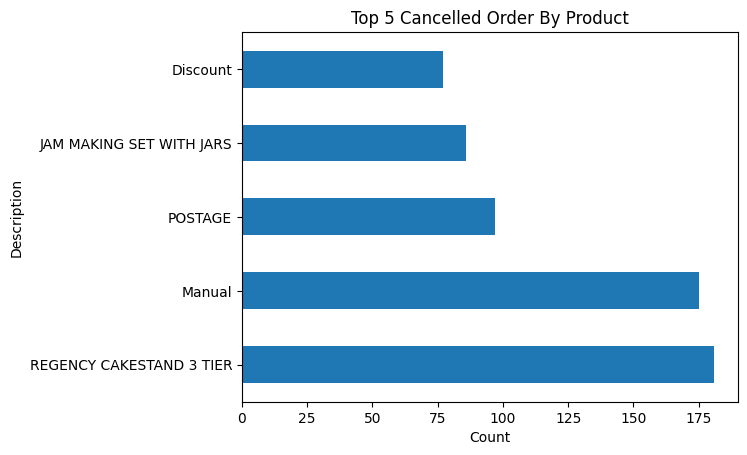

In [25]:
#Apply the bar function
bar(Cancelled_Product, y_column='Count', title='Top 5 Cancelled Order By Product', xlabel='Count', ylabel='Description')

Regency cakestand tier 3 was returened the most due to some specific reasons

In [26]:
##FEATURE ENGINEERING

#From the retail datasets, create a new column called sales by multiplying Quantity by UnitPrice
Retail['Sales'] = Retail['Quantity'] * Retail['UnitPrice']
Retail

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09,0.85,12680.0,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09,2.10,12680.0,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09,4.15,12680.0,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09,4.15,12680.0,France,16.60


In [27]:
##Which product has the highest sales value
Product_Sales_Value = Retail.groupby('Description')['Sales'].sum().reset_index().sort_values(
                        by='Sales', ascending=False).set_index('Description').head()
Product_Sales_Value

,Sales
Description,
REGENCY CAKESTAND 3 TIER,132870.40
WHITE HANGING HEART T-LIGHT HOLDER,93823.85
JUMBO BAG RED RETROSPOT,83236.76
PARTY BUNTING,67687.53
POSTAGE,66710.24


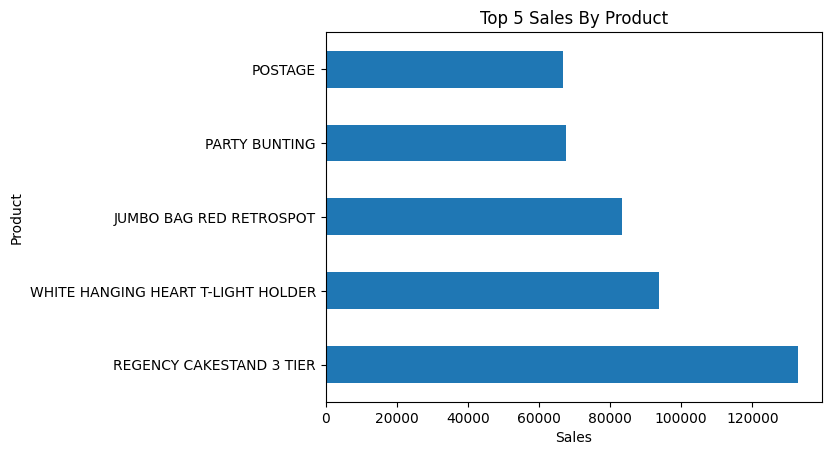

In [28]:
bar(Product_Sales_Value, y_column='Sales', title='Top 5 Sales By Product', xlabel='Sales', ylabel='Product')

Its interesting that despite the fact that Regency Cakestand recorded the most returned product and yet, it still turn out to be the most valuable product. This shows that the reason for high number of return for Regency cakestand is due to the fact that the product is fragile. It is prone to damage when delivering the product. The delivery department and agents should be more careful when delivering  this particular product.

In [29]:
#Which country has the highest sales value 
Country_Sales_Value = Retail.groupby('Country')['Sales'].sum().reset_index().sort_values(
                        by='Sales', ascending=False).set_index('Country').head()
Country_Sales_Value

,Sales
Country,
United Kingdom,6767873.394
Netherlands,284661.540
EIRE,250285.220
Germany,221698.210
France,196712.840


United Kingdom recorded the highest number of quantity ordered and recorded the highest sales. 

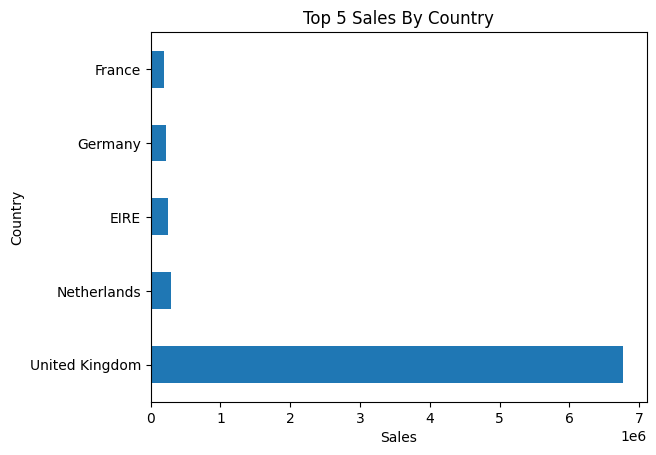

In [30]:
bar(Country_Sales_Value, y_column='Sales', title='Top 5 Sales By Country', xlabel='Sales', ylabel='Country')

In [31]:
#Summary Stats
Retail.describe()

,Quantity,UnitPrice,Sales
count,406829.000000,406829.000000,406829.000000
mean,12.061303,3.460471,20.401854
std,248.693370,69.315162,427.591718
min,-80995.000000,0.000000,-168469.600000
25%,2.000000,1.250000,4.200000
50%,5.000000,1.950000,11.100000
75%,12.000000,3.750000,19.500000
max,80995.000000,38970.000000,168469.600000


In [32]:
#There seems to be a lot of outliers in the datasets. lets visualize this with boxplot


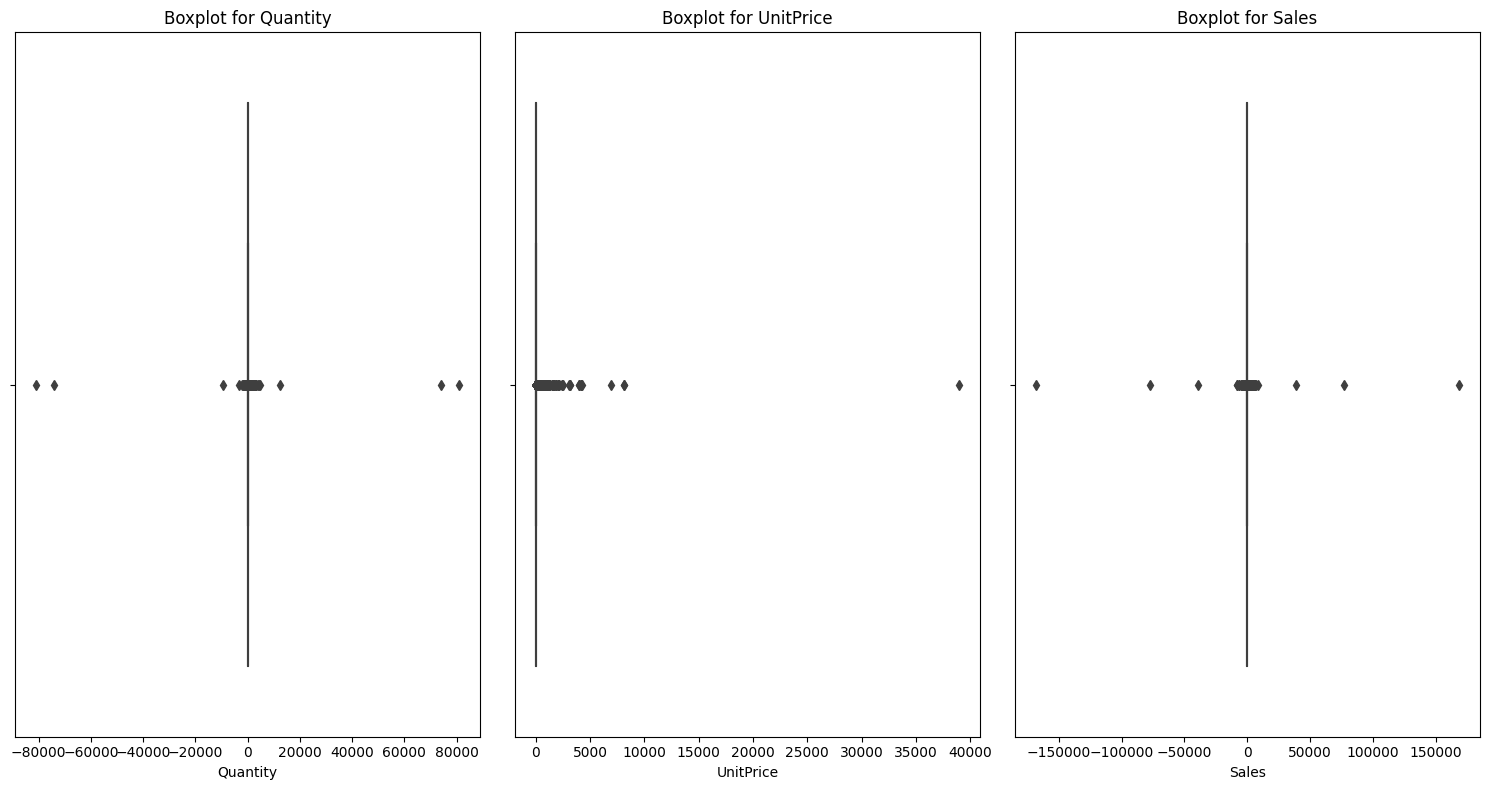

In [33]:
def box_plot(data, columns): #Define function box_plot
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15,8))
    sns.boxplot(data=Retail, x= 'Quantity', ax=ax1) #Boxplot for Quantity
    ax1.set_title('Boxplot for Quantity') #Set title for the boxplot
    
    sns.boxplot(data=Retail, x= 'UnitPrice', ax=ax2) #Boxplot for Unit Price
    ax2.set_title('Boxplot for UnitPrice')  #Set title for the boxplot
    
    sns.boxplot(data=Retail, x= 'Sales', ax=ax3) #Boxplot for Sales
    ax3.set_title('Boxplot for Sales')  #Set title for the boxplot
    plt.tight_layout()
    
box_plot(data=Retail, columns=['Quantity', 'UnitPrice', 'Sales']) #Apply the function of the box_plot
    
    

In [34]:
#These indicate the esixtence of outlier in the dataset
#However, as i explored the outliers of the datasets, i noticed a double entry in the datasets
#Take a look at the quantity outliers of values greater than 35000
quantity_outlier = Retail[Retail['Quantity'] > 35000]
quantity_outlier

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sales
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18,1.04,12346.0,United Kingdom,77183.6
540421,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,2011-12-09,2.08,16446.0,United Kingdom,168469.6


In [35]:
#Now take a look at quantity outliers with values less than 35000
quantity_outlier_ = Retail[Retail['Quantity'] < -35000]
quantity_outlier_

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sales
61624,C541433,23166,MEDIUM CERAMIC TOP STORAGE JAR,-74215,2011-01-18,1.04,12346.0,United Kingdom,-77183.6
540422,C581484,23843,"PAPER CRAFT , LITTLE BIRDIE",-80995,2011-12-09,2.08,16446.0,United Kingdom,-168469.6


In [36]:
#Notice that it outputs are the same apart from the fact that one part of the invoice no is cancelled and one is not
#As a reult, to avoid distraction, lets take out the outliers and visualze once again with the boxplot

In [37]:
def remove_outliers(df, columns, threshold=1.5):
    for col in columns:
        # Calculate IQR
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        # Define lower and upper bounds
        lower_bound = Q1 - threshold * IQR
        upper_bound = Q3 + threshold * IQR
        # Remove Outliers
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

# Specify columns for outlier removal
columns_for_outlier = ['Quantity', 'UnitPrice', 'Sales']

# Remove outliers for the columns
Retail_cld = remove_outliers(Retail, columns_for_outlier)

        

In [38]:
Retail_cld

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09,0.85,12680.0,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09,2.10,12680.0,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09,4.15,12680.0,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09,4.15,12680.0,France,16.60


In [39]:
Retail_cld.describe()

,Quantity,UnitPrice,Sales
count,330007.000000,330007.000000,330007.000000
mean,6.908020,2.130439,10.572924
std,6.563751,1.502901,8.424807
min,-13.000000,0.000000,-16.390000
25%,2.000000,1.060000,3.480000
50%,4.000000,1.650000,9.750000
75%,12.000000,2.950000,16.500000
max,27.000000,7.500000,37.350000


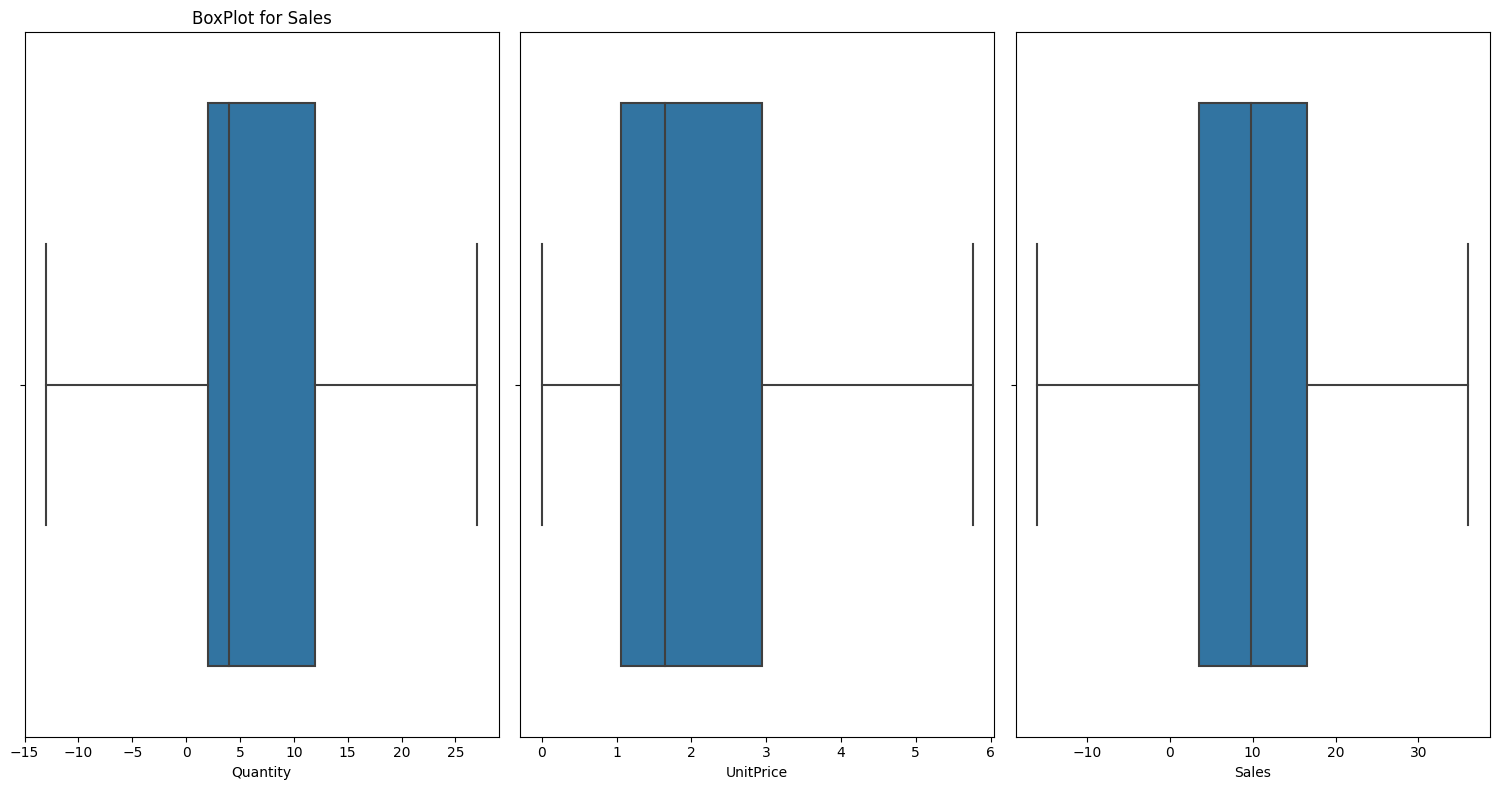

In [40]:
#Check out the boxplot again to avoid outliers
def box_plot(data, columns):
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 8))
    sns.boxplot(data=Retail_cld, x='Quantity', ax=ax1, sym="")
    ax1.set_title('Boxplot for Quantity')
    
    sns.boxplot(data=Retail_cld, x='UnitPrice', ax=ax2, sym="")
    ax1.set_title('Boxplot for UnitPrice')
   
    sns.boxplot(data=Retail_cld, x='Sales', ax=ax3, sym="")
    ax1.set_title('BoxPlot for Sales')
    plt.tight_layout()
    
box_plot(data=Retail_cld, columns=['Quantity', 'UnitPrice', 'Sales'])

In [41]:
#The data distribution is better to work with


In [42]:
selected_cols = ["Quantity","UnitPrice", "Sales"]
col_data = Retail_cld.loc[:,selected_cols]
col_data

,Quantity,UnitPrice,Sales
0,6,2.55,15.30
1,6,3.39,20.34
2,8,2.75,22.00
3,6,3.39,20.34
4,6,3.39,20.34
...,...,...,...
541904,12,0.85,10.20
541905,6,2.10,12.60
541906,4,4.15,16.60
541907,4,4.15,16.60


In [43]:
def distributions(df):
    fig, (ax1, ax2, ax3) = plt.subplots(3,1, figsize=(8,8))
    sns.distplot(df["Quantity"], ax=ax1)
    sns.distplot(df["UnitPrice"], ax=ax2)
    sns.distplot(df["Sales"], ax=ax3)
    plt.tight_layout()

C:\Users\DELL\AppData\Local\Temp\ipykernel_9892\75592679.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Quantity"], ax=ax1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_9892\75592679.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["UnitPrice"], ax=ax2)
C:\Users\DELL\AppData\Local\T

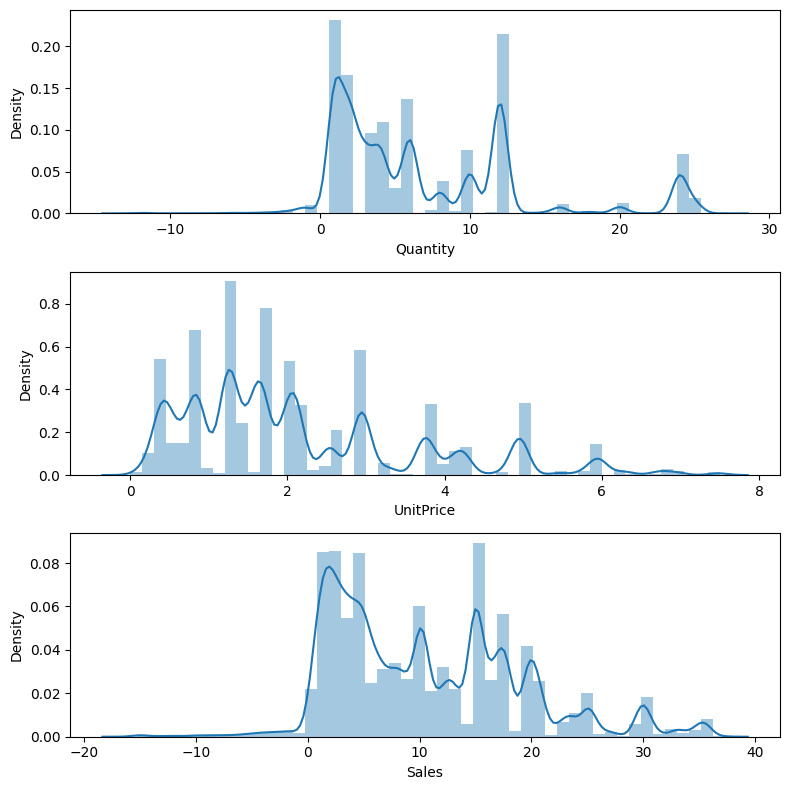

In [44]:
distributions(col_data)

CUSTOMER SEGMENTATION WITH RFM (Recency, Frequency and Monetary)

Recency: This has to do with the time since the customers made the last puchase, be it days, months or years.

Frequency: This has to do with how frequent the customers has made a purchase. The number of complete purchase made by a custommer in a particular period.

Monetary: This has to do with the total amount of money spent by a customer in a particular period.

In [45]:
Retail_cld

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09,0.85,12680.0,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09,2.10,12680.0,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09,4.15,12680.0,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09,4.15,12680.0,France,16.60


The goal is to segment the customer based on Recency, Frequency and Monetary values.
So recall that there are some cancelled transaction in the dataset. It will be a good practice to exclude the cancelled transaction because these transaction were reversed or voided and might not provide meaningful information for segmentation based on RFM.
Come to think of it:
In the context of Recency, including cancelled invoices or transaction might give the impression that a customer made a recent purchase when, in fact, the transaction was voided. Rather, it is better to focus on transactions that reflect the actual buying behavior and not transaction that were subsequently cancelled.  
However, including cancelled transactions might inflate the  frequency and monetary values for some customers. For example, a cancelled inovoice with a high monetary value could skew the results. 
In a nutshell, excluding the cancelled invoices provides a cleaner representation of customers who have completed transactions and are more likely to make future purchases.

In [46]:
# Exclude the cancelled invoices
Completed = Retail_cld[~Retail_cld['InvoiceNo'].str.startswith('C', na=False)]
Completed

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09,0.85,12680.0,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09,2.10,12680.0,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09,4.15,12680.0,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09,4.15,12680.0,France,16.60


In [47]:
#Let solve for Recency, Frequency and Monetary value simultaneously
#To find the recency, we need to use the latest date(maximum date) from the dataset as snapshot date for today
max_date = Completed['InvoiceDate'].max()
max_date

Timestamp('2011-12-09 00:00:00')

In [48]:
# i am using the latest date as "Today's" date because of the data structure
Today = datetime(2011, 12, 9)

In [49]:
completed_RFM = Completed.groupby('CustomerID').agg({'InvoiceDate': lambda x:(Today-x.max()).days, #Recency
                                                'InvoiceNo': pd.Series.nunique, #Frequency
                                                'Sales': 'sum'}) #Monetary Value
completed_RFM.columns =['Recency', 'Frequency', 'Monetary Value']

completed_RFM

,Recency,Frequency,Monetary Value
CustomerID,,,
12347.0,2,7,2783.37
12348.0,248,3,90.20
12349.0,18,1,939.75
12350.0,310,1,294.40
12352.0,36,7,1130.94
...,...,...,...
18280.0,277,1,137.00
18281.0,180,1,46.92
18282.0,7,2,113.13


In [50]:
#We need to score the Recency, Frequency and Monetary value 

In [51]:
#Then, i have to segment values of the Recency column in 4 quartile or groups, with which the lowest values of the recency has the higher score
#This is because the lower recency value indicates how earlier the customer makes purchase
completed_RFM['R'] = pd.qcut(completed_RFM['Recency'], 4, labels= range(4,0,-1))

In [52]:
# So, we repeat the same thing for frequency and monetary values with which the higher group of values have the higher score
frequency_labels = range(1,5)
completed_RFM["F"] = pd.qcut(completed_RFM['Frequency'].rank(method='first'), 4, labels=frequency_labels)

In [53]:
monetary_labels= range(1,5)
completed_RFM['M'] = pd.qcut(completed_RFM['Monetary Value'], 4, labels=monetary_labels)

In [54]:
completed_RFM

,Recency,Frequency,Monetary Value,R,F,M
CustomerID,,,,,,
12347.0,2,7,2783.37,4,4,4
12348.0,248,3,90.20,1,3,1
12349.0,18,1,939.75,4,1,3
12350.0,310,1,294.40,1,1,2
12352.0,36,7,1130.94,3,4,4
...,...,...,...,...,...,...
18280.0,277,1,137.00,1,2,1
18281.0,180,1,46.92,1,2,1
18282.0,7,2,113.13,4,3,1


In [55]:
#The next thing is to sum the string values the R, F, M columns to aggregate the score
def score(x): return str(x['R']) + str(x['F']) + str(x['M'])

In [56]:
#Apply the function above
completed_RFM['RFM_Segment']= completed_RFM.apply(score, axis=1)

In [57]:
#After applying the function, we sum the R, F, M values together to get RFM_Score. "The higher the score, the more active the consumer is simulataenously"
completed_RFM['RFM_Score'] = completed_RFM[['R', 'F', 'M']].sum(axis=1)

In [58]:
completed_RFM

,Recency,Frequency,Monetary Value,R,F,M,RFM_Segment,RFM_Score
CustomerID,,,,,,,,
12347.0,2,7,2783.37,4,4,4,4.04.04.0,12
12348.0,248,3,90.20,1,3,1,1.03.01.0,5
12349.0,18,1,939.75,4,1,3,4.01.03.0,8
12350.0,310,1,294.40,1,1,2,1.01.02.0,4
12352.0,36,7,1130.94,3,4,4,3.04.04.0,11
...,...,...,...,...,...,...,...,...
18280.0,277,1,137.00,1,2,1,1.02.01.0,4
18281.0,180,1,46.92,1,2,1,1.02.01.0,4
18282.0,7,2,113.13,4,3,1,4.03.01.0,8


In [59]:
completed_RFM.groupby('RFM_Segment').size().sort_values(ascending=False).head(10)

RFM_Segment
4.04.04.0    467
1.01.01.0    276
3.04.04.0    203
1.01.02.0    171
1.02.01.0    170
3.03.03.0    154
2.01.01.0    135
1.02.02.0    132
4.03.03.0    122
2.03.03.0    119
dtype: int64

In [60]:
#Group the values of the RFM score and aggregate the mean. The higher the Score, the higher the values of the RFM.
completed_RFM.groupby('RFM_Score').agg({'Recency' : 'mean',
                                       'Frequency' : 'mean',
                                       'Monetary Value' : 'mean'})

,Recency,Frequency,Monetary Value
RFM_Score,,,
3,264.659420,1.000000,87.163551
4,209.487395,1.067227,156.925063
5,143.288032,1.283976,225.143126
6,95.361111,1.626068,287.207115
7,75.849282,2.000000,425.330411
8,54.971649,2.639175,502.267938
9,46.308219,3.630137,803.304135
10,31.978142,4.838798,1067.103279
11,21.401685,7.191011,1726.426601


For better understanding and insights, we will segment customers based on the RFM scores.
By grouping customers into these segments, it becomes easy to focus on a particular marketing strategy to address the 
specific needs, behaviours and lifecycle stages of each segment ultimately driving growth, retention and profitable actions

In [61]:
def segment(df):
    if df['RFM_Score'] >= 10:
        return "High Value Customers"
    elif (df['RFM_Score'] >= 7) & (df['RFM_Score'] <= 9):
        return "Promising Customers"
    elif (df['RFM_Score'] >=4) & (df['RFM_Score'] <=7):
        return "Needs Attention"
    else:
        return "At-Risk Customers"
    
completed_RFM['Grouped'] = completed_RFM.apply(segment, axis=1)

    

In [62]:
completed_RFM

,Recency,Frequency,Monetary Value,R,F,M,RFM_Segment,RFM_Score,Grouped
CustomerID,,,,,,,,,
12347.0,2,7,2783.37,4,4,4,4.04.04.0,12,High Value Customers
12348.0,248,3,90.20,1,3,1,1.03.01.0,5,Needs Attention
12349.0,18,1,939.75,4,1,3,4.01.03.0,8,Promising Customers
12350.0,310,1,294.40,1,1,2,1.01.02.0,4,Needs Attention
12352.0,36,7,1130.94,3,4,4,3.04.04.0,11,High Value Customers
...,...,...,...,...,...,...,...,...,...
18280.0,277,1,137.00,1,2,1,1.02.01.0,4,Needs Attention
18281.0,180,1,46.92,1,2,1,1.02.01.0,4,Needs Attention
18282.0,7,2,113.13,4,3,1,4.03.01.0,8,Promising Customers


In [63]:
#Group the segment together and aggregate the mean
completed_RFM.groupby('Grouped').agg({'Recency':'mean',
                                     'Frequency':'mean',
                                     'Monetary Value':['mean', 'count']}).round(1)

Recency Frequency Monetary Value      
                        mean      mean           mean count
Grouped                                                    
At-Risk Customers      264.7       1.0           87.2   276
High Value Customers    19.1       8.9         2060.5  1189
Needs Attention        149.6       1.3          222.8  1437
Promising Customers     58.9       2.8          582.4  1244

High value Customers have a low average recency. This means that the average number of days for this set of customers to make another purchase is 19 days. This set of customers also have a higher average value of Frequency and Monetary value. This depicts that they make purchases more frequently than other segments and with a higher monetary value. The 'At-Risk Customers' have a high average recency. This means that the average number of days for this set of customers to make a
purchase is after 264 days. This set of customers also have a low average value of Frequency and Monetary value. They hadly make purchase and contribute low amount of monetary value to the business.

Now, let's proceed to run a K-means clustering to segregate groups with similar traits assigned to them into clusters.
K-Means is an unsupervised machine learning algorithm designed to group a dataset into a distinct groups, or clusters.

   K-MEANS Clustering
   
  K-Means is an unsupervised machine learning algorithm designed to group a dataset into a distinct groups, or clusters.
   
1. Data processing: Normalize or standardize the data using StandardScaler. Fit the scaler to your data and transform it to standardized form.

2.Choosing a number of clusters: Determine most optimal k (i.e. no of clusters). Plot the within-cluster sum of squares (inertia) against the number of clusters and look for an "elbow" point where the rate of decrease sharply slows. This step ensures that you choose the best number of groups for your data.

3.Run K-means clustering on preprocessed data: Initialize the K-Means algorithm with the chosen number of clusters 𝑘.Then fit the K-Means model to the preprocessed data to create k clusters.

4. Assign data points to clusters: The K-Means algorithm will assign each data point to one of the k clusters based on the shortest distance to the cluster centroids. Then we add the cluster labels to the original dataset for further analysis.


In [64]:
# Scale the data
scaler = StandardScaler() #Initialize Standard Scaler
scaled_data = scaler.fit_transform(completed_RFM[['Recency', 'Frequency', 'Monetary Value']]) #Fit the scaler to RFM values

In [65]:
scaled_data

array([[-0.90663122,  0.45165743,  1.09617565],
       [ 1.55430045, -0.13485003, -0.42975145],
       [-0.74657063, -0.42810376,  0.05159632],
       ...,
       [-0.85661229, -0.2814769 , -0.4167595 ],
       [-0.89662744,  1.77129921,  0.68177633],
       [-0.50647973, -0.13485003, -0.02369802]])

In [66]:
scaled_data = pd.DataFrame(scaled_data, columns=['R', 'F', 'M']) #Change the scaled data from a lists of list into a DataFrame 
scaled_data

,R,F,M
0,-0.906631,0.451657,1.096176
1,1.554300,-0.134850,-0.429751
2,-0.746571,-0.428104,0.051596
3,2.174535,-0.428104,-0.314053
4,-0.566502,0.451657,0.159923
...,...,...,...
4141,1.844410,-0.428104,-0.403235
4142,0.874043,-0.428104,-0.454274
4143,-0.856612,-0.281477,-0.416760
4144,-0.896627,1.771299,0.681776


In [67]:
print(scaled_data.describe())

                  R             F             M
count  4.146000e+03  4.146000e+03  4.146000e+03
mean   2.442169e-17 -1.028282e-17  2.399324e-17
std    1.000121e+00  1.000121e+00  1.000121e+00
min   -9.266388e-01 -4.281038e-01 -4.808580e-01
25%   -7.465706e-01 -4.281038e-01 -3.823957e-01
50%   -4.164456e-01 -2.814769e-01 -2.512780e-01
75%    5.139066e-01  1.177683e-02  6.403442e-02
max    2.804774e+00  2.787088e+01  3.939155e+01


In [68]:
#Identifying the optimum number of clusters

In [69]:
def k_means(data, k_max):
    # Lists to store the number of clusters and corresponding inertia values
    means = []
    inertias = []

    # Iterate over the range from 1 to k_max
    for k in range(1, k_max):
        kmeans = KMeans(n_clusters=k)  # Initialize kMeans model with k clusters
        kmeans.fit(data)  # Fit the model to the dataset
        
        means.append(k)  # Append the number of clusters to means list
        inertias.append(kmeans.inertia_)  # Append the corresponding inertia to inertias list
        
    # Generate the elbow plot
    fig = plt.subplots(figsize=(8, 5)) 
    plt.plot(means, inertias, 'o-')  # Plot the number of clusters vs. inertia
    plt.xlabel('Number of clusters')  # Label for x-axis
    plt.ylabel('Inertia')  # Label for y-axis
    plt.show()  # Display the plot

C:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\

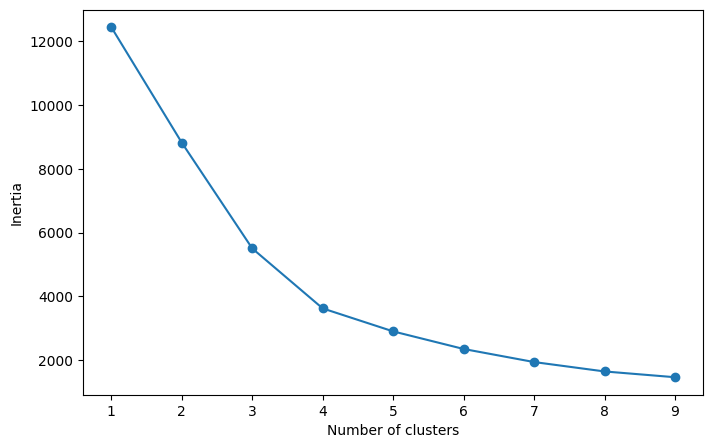

In [70]:
#Apply the K_means function
k_means(scaled_data, 10)

To determine the optimum number of clusters, we are going to select a unique number of clusters at the point after which the 
inertia start to decrease in a linear direction. Thus, for the plot above, we conclude that the optimum number of clusters for the data is 4.

In [71]:
#Apply Kmeans clustering

In [72]:
kmeans= KMeans(n_clusters= 4)
kmeans.fit(scaled_data)

C:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=4)

In [73]:
# Assign the cluster labels to a new column 'Cluster' in the scaled_data DataFrame
scaled_data.assign(Cluster=kmeans.labels_)  # kmeans.labels_ contains the cluster labels for each data point in scaled_data
scaled_data['Cluster'] = kmeans.labels_ 

In [74]:
scaled_data.groupby('Cluster').mean()

,R,F,M
Cluster,,,
0,-0.479176,-0.102342,-0.092301
1,1.547913,-0.355432,-0.332053
2,-0.791620,1.825344,1.668714
3,-0.911633,20.722822,19.894516


In [75]:
# Calculate cluster centroids and inverse transform to original scale
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)
cluster_centers = pd.DataFrame(cluster_centers, columns=['Recency', 'Frequency', 'Monetary Value'])
print(cluster_centers)

      Recency   Frequency  Monetary Value
0   44.729382    3.221707      685.780262
1  247.361516    1.495627      262.632226
2   13.496795   16.368590     3793.865673
3    1.500000  145.250000    35961.315000


In [76]:
#Add clusters to the Original DataFrame "completed_RFM"
completed_RFM['Cluster'] = kmeans.labels_

In [77]:
# Group by cluster and calculate mean values
cluster_means = completed_RFM.groupby('Cluster').mean()

In [78]:
cluster_means

,Recency,Frequency,Monetary Value,RFM_Score
Cluster,,,,
0,44.729382,3.221707,685.780262,8.174581
1,247.361516,1.495627,262.632226,4.432459
2,13.496795,16.368590,3793.865673,11.701923
3,1.500000,145.250000,35961.315000,12.000000


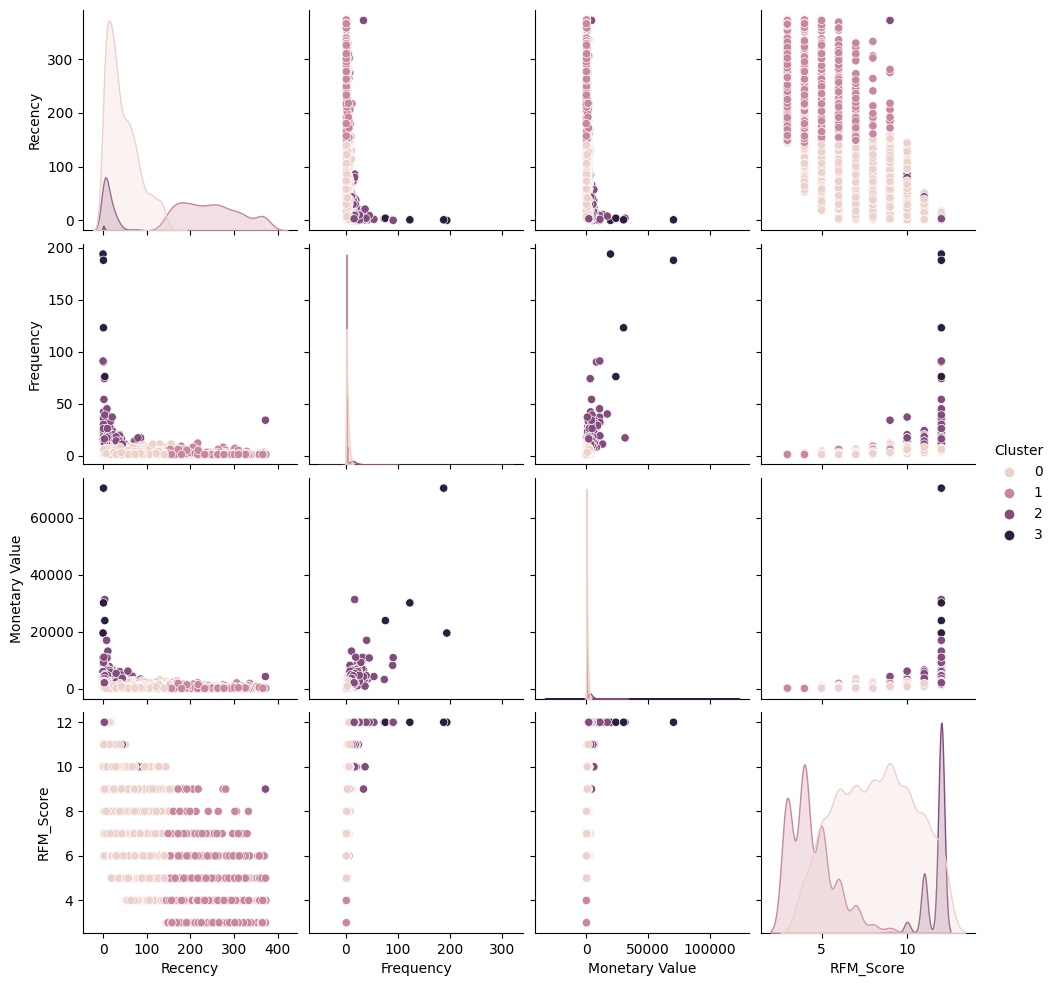

In [79]:
#Visualize with pairplot
sns.pairplot(completed_RFM, hue='Cluster', diag_kind= 'auto')
plt.show()

The above vsual is called a pairplot visualization. 
Pairplot visualizes given data to find the relationship between them where the variables can be continuous or categorical.
As you can see, there is a positive relationship between the monetary value and frequency in correlation with the clusters.


 Now, Let us assign the clusters into a meaningful terms. 
 
 Where:
 
 Cluster 0 = Need Attention       
 
 Cluster 1 = At-Risk Customers
 
 Cluster 2 = Promising Customers
 
 Cluster 3 = High-Value Customers

In [80]:
#Lets map the cluster labels
cluster_mapping = {0: 'Need Attention', 1: 'At-Risk Customers', 2: 'Promising Customers', 3: 'High-Value Customers'}

In [81]:
cluster_means.index = cluster_means.index.map(cluster_mapping)


In [82]:
cluster_means

,Recency,Frequency,Monetary Value,RFM_Score
Cluster,,,,
Need Attention,44.729382,3.221707,685.780262,8.174581
At-Risk Customers,247.361516,1.495627,262.632226,4.432459
Promising Customers,13.496795,16.368590,3793.865673,11.701923
High-Value Customers,1.500000,145.250000,35961.315000,12.000000


So based on the clusters, High-value customers contributes the highest monetary value to the company. Then, the promising
customers also contributed some significant amount to the monetary value. 
Marketing effort should be targeted towards the 'Need Attention' and 'At-Risk' customers so as to bring more value to the 
company

Therefore, The High-Value customers and the promising customers have a strong potential to become the top customer segments for 
the retail company, provided targeted marketing strategies are implemented to retain them. 
In contrast, The 'Need Attention' customers and the 'At-Risk' customers consists of customers who are likely to be churned or lost if not some already churned.  

Save the followung tables as csv for visualization

Retail DataFrame
Cancelled dataframe
Cluster means

In [83]:
#Define the file path to save the CSV file
file_path = r'C:\Users\DELL\OneDrive\Documents\New folder\Retail.csv'
file_path2 = r'C:\Users\DELL\OneDrive\Documents\New folder\Cluster.csv'
file_path3 = r'C:\Users\DELL\OneDrive\Documents\New folder\Cancelled.csv'
file_path4 = r'C:\Users\DELL\OneDrive\Documents\New folder\completed_RFM.csv'

In [84]:
Retail_csv = Retail.to_csv(file_path, index=False)

In [85]:
cluster_means_cvs= cluster_means.to_csv(file_path2, index=True)

In [86]:
Cancelled_csv= Cancelled.to_csv(file_path3, index=False)

In [87]:
Completed_RFM_csv = completed_RFM.to_csv(file_path4, index=True)